<a href="https://colab.research.google.com/github/Galahexolion/Giliojo-mokymo-sistem-taikymai/blob/main/Lab9_AE/lab9_ae_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- 1. DUOMENYS (Orų) ---

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

try:
    df = pd.read_csv('lab_data.csv')
except:
    url = "https://raw.githubusercontent.com/vytkuc/inf4039_2024_autumn/refs/heads/main/lab06_RNN/lab_data.csv"
    df = pd.read_csv(url)

# Paruošimas
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df['MedTemp'].values.reshape(-1, 1))
train_data, test_data = train_test_split(X_scaled, test_size=0.2, shuffle=False)

def get_XY(dat, time_steps):
    X = []
    # Autoenkoderiui X ir Y yra tas pats (įėjimas = išėjimas)
    for i in range(len(dat) - time_steps):
        X.append(dat[i:(i + time_steps), 0])
    return np.array(X).reshape(-1, time_steps, 1)

time_steps = 7
trainX = get_XY(train_data, time_steps)
testX = get_XY(test_data, time_steps)

print(f"Train shape: {trainX.shape}")

Train shape: (2735, 7, 1)


In [2]:
# --- 2. LSTM AUTOENKODERIS ---
model = keras.Sequential([
    # Encoder
    layers.LSTM(32, activation='tanh', input_shape=(time_steps, 1), return_sequences=False),
    # Dabar turime vektorių (32,). Reikia jį pakartoti, kad Decoderis galėtų dirbti
    layers.RepeatVector(time_steps),
    # Decoder
    layers.LSTM(32, activation='tanh', return_sequences=True),
    layers.TimeDistributed(layers.Dense(1)) # Kiekvienam laiko žingsniui atskiras Dense
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 7, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 7, 32)          │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 7, 1)           │            33 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,705 (49.63 KB)

 Trainable params: 12,705 (49.63 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# --- 3. MOKYMAS ---
# Mokome atkurti tą pačią seką: trainX -> trainX
history = model.fit(trainX, trainX, epochs=20, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0841 - val_loss: 0.0063
Epoch 2/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0059 - val_loss: 0.0047
Epoch 3/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0050 - val_loss: 0.0042
Epoch 4/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0045 - val_loss: 0.0039
Epoch 5/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 6/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0039 - val_loss: 0.0034
Epoch 7/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0037 - val_loss: 0.0033
Epoch 8/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0036 - val_loss: 0.0032
Epoch 9/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0035 - val_loss: 0.0031
Epoch 10/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0034 - val_loss: 0.0030
Epoch 11/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0033 - val_loss: 0.0029
Epoch 12/20
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/s

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


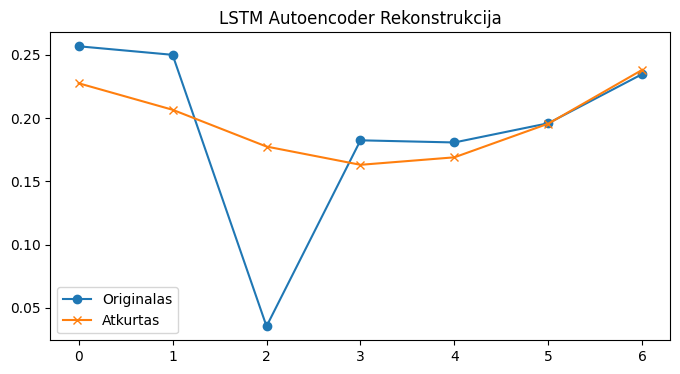

In [4]:
# --- 4. VIZUALIZACIJA ---
# Paimame vieną seką iš testavimo duomenų
seq_idx = 0
test_seq = testX[seq_idx:seq_idx+1] # (1, 7, 1)
reconstructed_seq = model.predict(test_seq)

# Atvaizduojame
plt.figure(figsize=(8,4))
plt.plot(test_seq.flatten(), label='Originalas', marker='o')
plt.plot(reconstructed_seq.flatten(), label='Atkurtas', marker='x')
plt.title('LSTM Autoencoder Rekonstrukcija')
plt.legend()
plt.show()